In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score , roc_auc_score ,log_loss,roc_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import ensemble
from sklearn import metrics

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [4]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

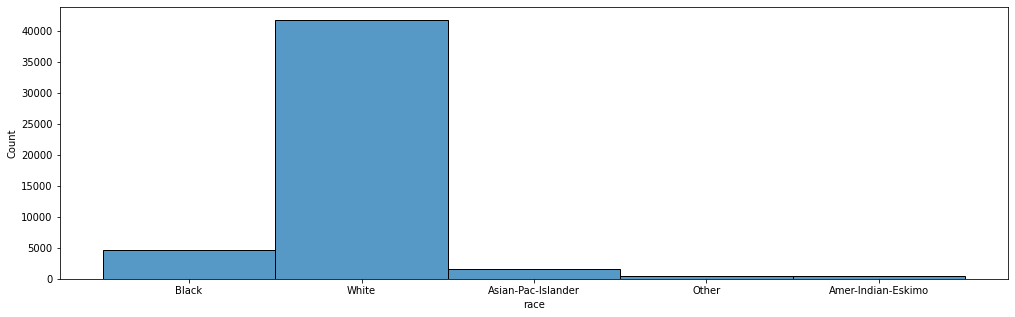

In [7]:
fig, ax = plt.subplots(figsize=(17,5))
sns.histplot(df['race'],ax=ax)

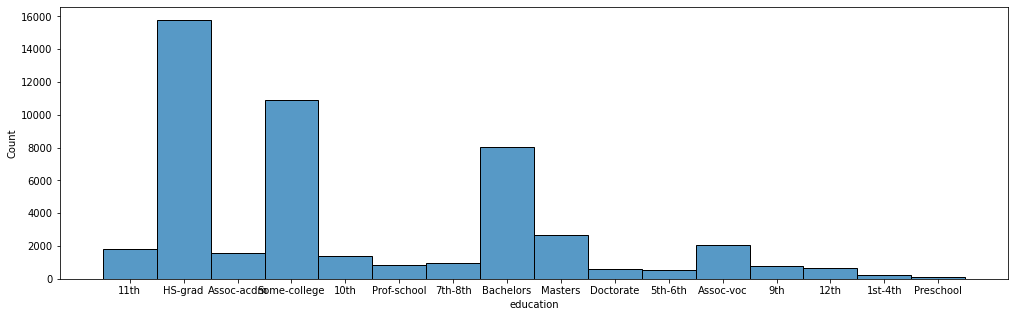

In [8]:
fig, ax = plt.subplots(figsize=(17,5))
sns.histplot(df['education'],ax=ax)

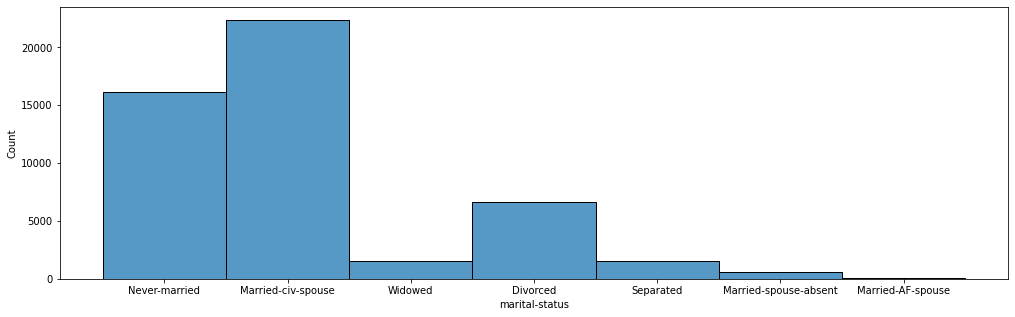

In [9]:
fig, ax = plt.subplots(figsize=(17,5))
sns.histplot(df['marital-status'],ax=ax)

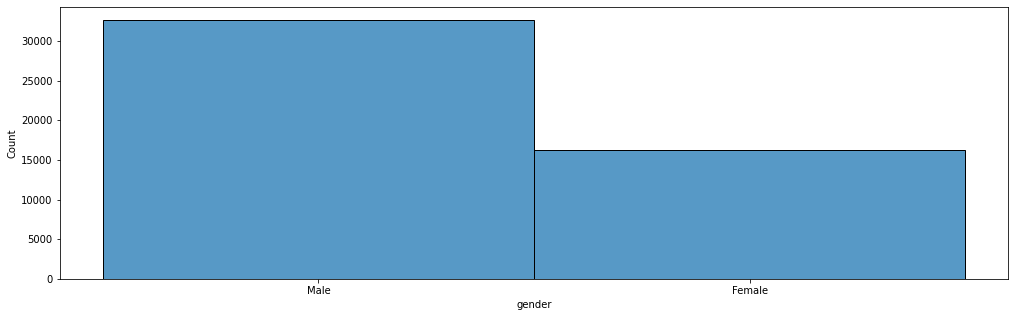

In [10]:
fig, ax = plt.subplots(figsize=(17,5))
sns.histplot(df['gender'],ax=ax)

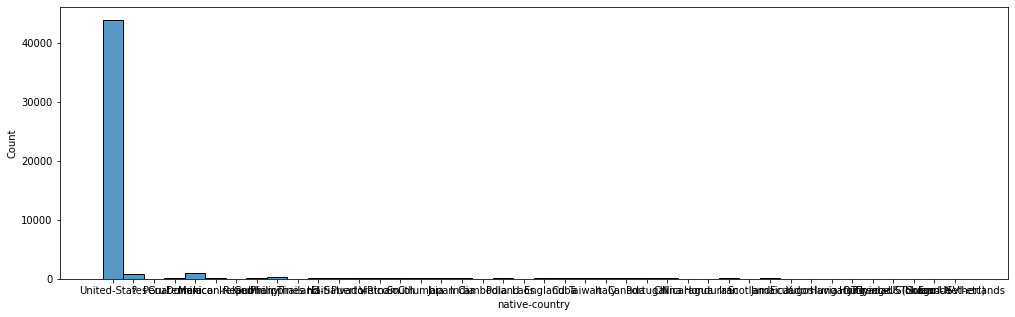

In [11]:
fig, ax = plt.subplots(figsize=(17,5))
sns.histplot(df['native-country'],ax=ax)

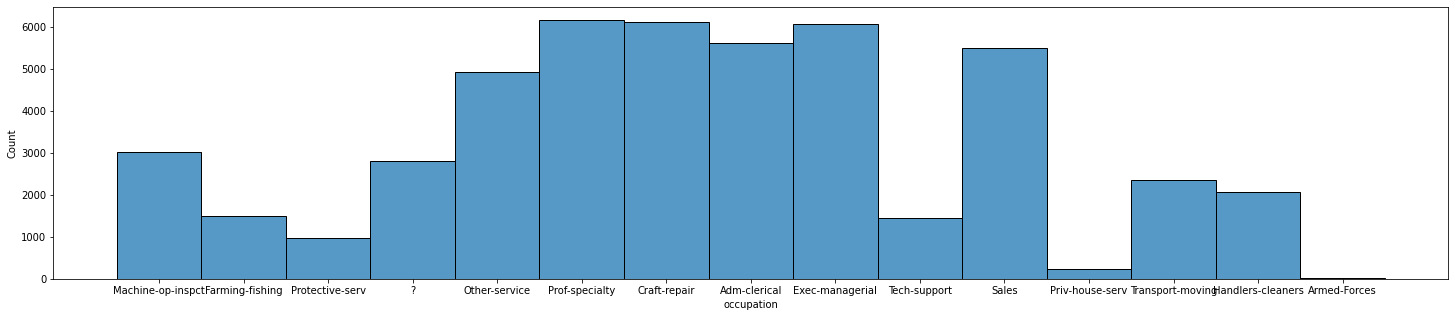

In [12]:
fig, ax = plt.subplots(figsize=(25,5))
sns.histplot(df['occupation'],ax=ax)

In [13]:
df=df.replace('?',np.nan)

In [14]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['gender']= label_encoder.fit_transform(df['gender'])
df['education']= label_encoder.fit_transform(df['education'])
df['race']= label_encoder.fit_transform(df['race'])
df['workclass']= label_encoder.fit_transform(df['workclass'])
df['relationship']= label_encoder.fit_transform(df['relationship'])
df['income']= label_encoder.fit_transform(df['income'])
df['marital-status']= label_encoder.fit_transform(df['marital-status'])
df['native-country']= label_encoder.fit_transform(df['native-country'])
df['occupation']= label_encoder.fit_transform(df['occupation'])

In [15]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [16]:
df.dropna(inplace = True)

In [17]:
x = df[['age','workclass', 'education','fnlwgt', 'occupation', 'relationship','marital-status', 'native-country', 'educational-num', 'race', 'gender', 'capital-gain','capital-loss', 'hours-per-week']]
y = df['income']
X = StandardScaler().fit_transform(x)

Counter({0: 37155, 1: 37155})


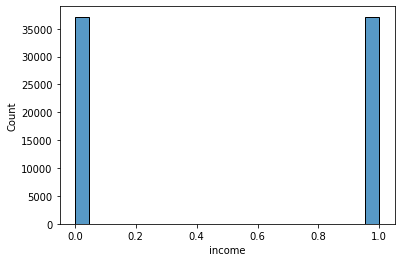

In [18]:
from imblearn.over_sampling import SMOTE
from collections import Counter
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)
counter = Counter(y)
print(counter)
sns.histplot(y)

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [20]:
model = DecisionTreeClassifier(random_state=0)
model.fit(x_train, y_train)  

DecisionTreeClassifier(random_state=0)

In [21]:
y_pred = model.predict(x_test)

In [22]:
cm = confusion_matrix(y_test, y_pred)  
cm

array([[6357, 1077],
       [ 993, 6435]])

In [23]:
print (classification_report(y_test, y_pred))
print('AUC-ROC:',roc_auc_score(y_test, y_pred))
print('LOGLOSS Value is',log_loss(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      7434
           1       0.86      0.87      0.86      7428

    accuracy                           0.86     14862
   macro avg       0.86      0.86      0.86     14862
weighted avg       0.86      0.86      0.86     14862

AUC-ROC: 0.8607208703146657
LOGLOSS Value is 4.810666687114617


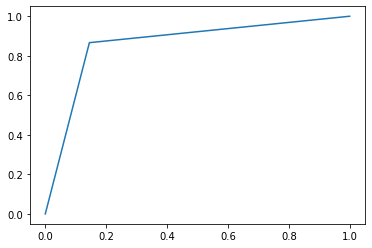

In [24]:
fpr,tpr,_= roc_curve(y_test, y_pred, pos_label=1)
sns.lineplot(fpr,tpr)

In [25]:
model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)  

LogisticRegression(random_state=0)

In [26]:
y_pred = model.predict(x_test)

In [27]:
cm = confusion_matrix(y_test, y_pred)  
cm

array([[5444, 1990],
       [2968, 4460]])

In [28]:
print (classification_report(y_test, y_pred))
print('AUC-ROC:',roc_auc_score(y_test, y_pred))
print('LOGLOSS Value is',log_loss(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.73      0.69      7434
           1       0.69      0.60      0.64      7428

    accuracy                           0.67     14862
   macro avg       0.67      0.67      0.66     14862
weighted avg       0.67      0.67      0.66     14862

AUC-ROC: 0.6663709029334286
LOGLOSS Value is 11.52232839219844


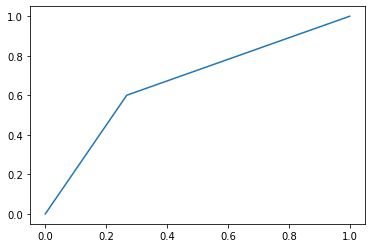

In [29]:
fpr,tpr,_= roc_curve(y_test, y_pred, pos_label=1)
sns.lineplot(fpr,tpr)